## Which Housing Features Influence Price?
### An Analysis Using King County Housing Data

* Analyst: Shannon McChesney
* Blog post URL: https://samcches.github.io/why_is_this_house_so_expensive
* Tableau Presentation: https://public.tableau.com/shared/HZBRPPGBQ?:display_count=y&:origin=viz_share_link
* Original Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction


First we will import the appropriate programs/libraries to assist us in our analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Next we will import the dataset,

In [2]:
kings = pd.read_csv('kc_house_data.csv')

and preview the first few lines:

In [3]:
kings.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now that we have a preview of the data, we'll find out more information on the number of entries, the means, standard deviation, and more that we can use to formulate our questions and decide how to tidy our data before processing.

In [4]:
kings.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above column data we can tell that some of the columns have missing values. We can see how many below.

In [6]:
kings.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront column contains boolean values ("Yes, it is a waterfront property" or "No, it isn't.") For practicality's sake, and since the null values make up roughly 18% of the missing values, we can go ahead and mark them as "Not Waterfront". We will use the same process for the questions of whether the property has a view or the year (if any) the property was renovated.

In [7]:
kings.waterfront.unique()
kings.waterfront.isna().sum()
kings.waterfront.replace(np.NaN, 0, inplace=True)
kings.waterfront.isna().sum()

0

In [8]:
kings.view.unique()
kings.view.isna().sum()
kings.view.replace(np.NaN, 0, inplace=True)
kings.view.isna().sum()

0

In [9]:
kings.yr_renovated.unique()
kings.yr_renovated.replace(np.NaN, 0, inplace=True)
kings.yr_renovated.isna().sum()
kings.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [10]:
kings.sqft_basement.unique()
kings.sqft_basement.replace('?', '0.0', inplace=True)
pd.to_numeric(kings.sqft_basement, errors='ignore')

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

Now that we've replaced the null values, let's view the data in histograms to get a visual idea of our data.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

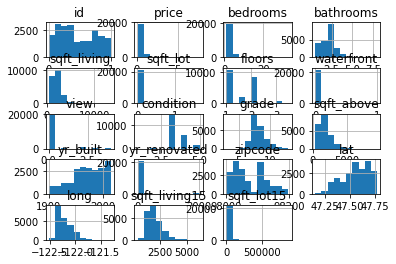

In [11]:
kings.hist()

Judging from the histograms above, the data needs to be cleaned before any relationships can be found. Some of the data, like the zipcode, needs to be modified to be categorical, while other data like Waterfront need to be changed to be boolean values.

But for now, we can start to get a general idea and begin to pose our questions.

### 1. Which Variable Best Correlates to a House's Selling Price?

Naturally, all good investors want a to make sure they eventually see a return. So, let's help them invest in the right property for their return needs.

The first question we will focus on is which of the variable best correlates to house selling price. Certain variables such as latitute and longitude are not independently useful to us, so we can go ahead and drop them from our analysis. 

In [12]:
data = kings[['price','zipcode', 'waterfront', 'sqft_living', 'grade', 'bathrooms', 'floors', 'condition', 'sqft_lot', 'yr_built', 'sqft_basement']].copy()
data.head()
data['sqft_basement'] = data['sqft_basement'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   zipcode        21597 non-null  int64  
 2   waterfront     21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   grade          21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   sqft_lot       21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


We will view the data in a heatmap to see the level of correlation between price and the other variables.

<AxesSubplot:>

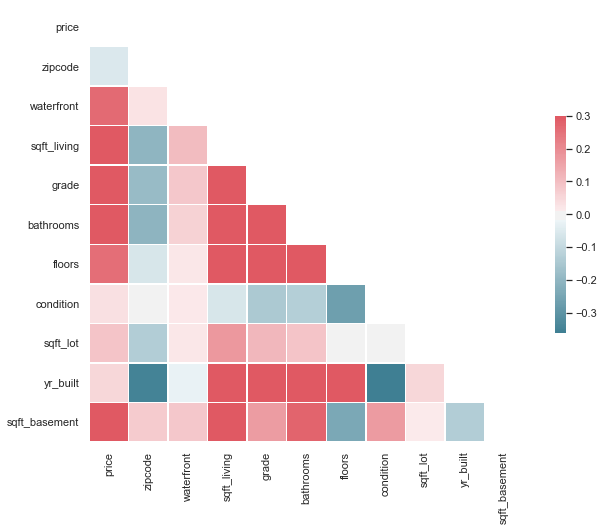

In [13]:
sns.set(style="white")


corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws= {"shrink": .5})

According to the above heatmap, there seems to be a correlation between price and the following variables: Square Feet of Living Space, Grade, Number of Bathrooms, and Floors. We can also see that there is a negative correlation between Year Built and Zip Code, as well as Year Built and Condition.

Now we clarify what we have seen in the heatmap, using scatterplots to see the individual spread between each of the columns above and price.

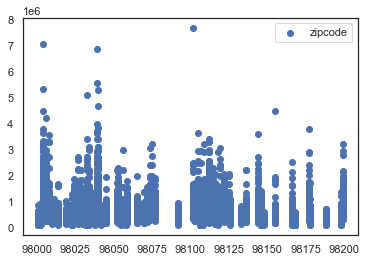

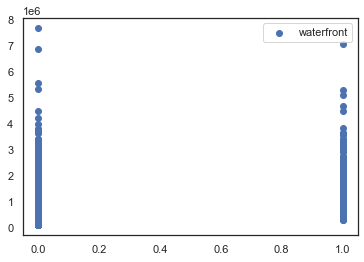

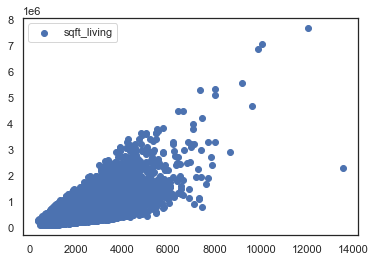

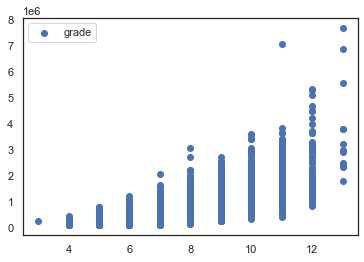

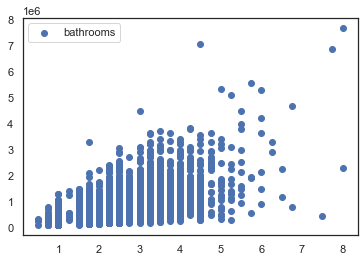

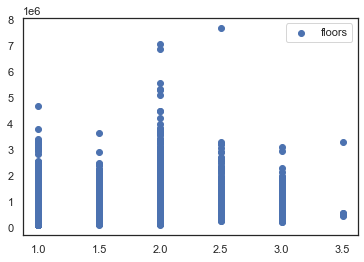

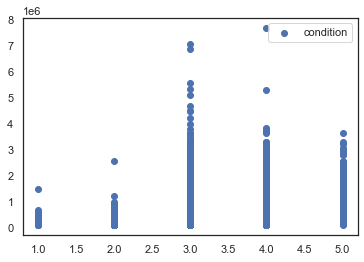

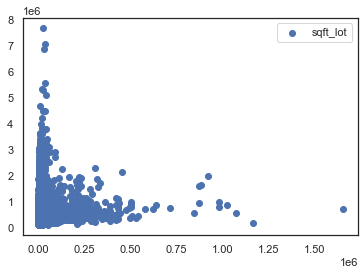

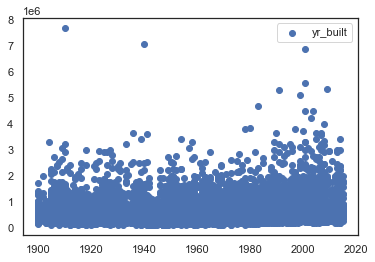

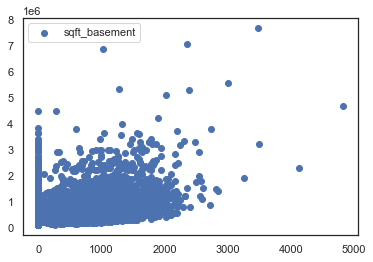

In [14]:
for column in ['zipcode', 'waterfront', 'sqft_living', 'grade', 'bathrooms', 'floors', 'condition', 'sqft_lot', 'yr_built', 'sqft_basement']:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   zipcode        21597 non-null  int64  
 2   waterfront     21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   grade          21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   sqft_lot       21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


There is a great deal of heteroscedascity in the square feet of living space, grade, and number of bathrooms scatterplots. 

In order to clean up the data, we will normalize it by subtracting the mean of the data from the data and dividing it by the standard deviation of the data column.

In [16]:
data.zipcode = (data.zipcode - data.zipcode.mean()) / data.zipcode.std()
data.waterfront = (data.waterfront - data.waterfront.mean()) / data.waterfront.std()
data.sqft_living = (data.sqft_living - data.sqft_living.mean()) / data.sqft_living.std()
data.grade = (data.grade - data.grade.mean()) / data.grade.std()
data.bathrooms = (data.bathrooms - data.bathrooms.mean()) / data.bathrooms.std()
data.floors = (data.floors - data.floors.mean()) / data.floors.std()
data.condition = (data.condition - data.condition.mean()) / data.condition.std()
data.sqft_lot = (data.sqft_lot - data.sqft_lot.mean()) / data.sqft_lot.std()
data.yr_built = (data.yr_built - data.yr_built.mean()) / data.yr_built.std()


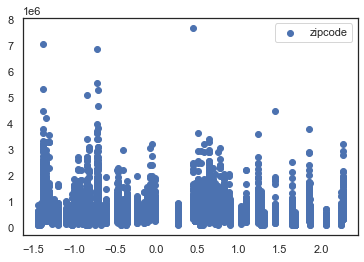

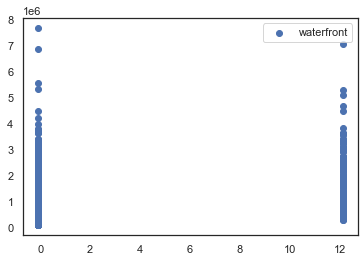

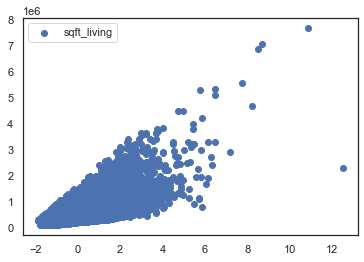

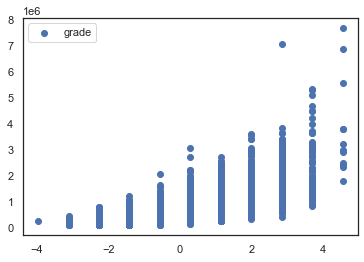

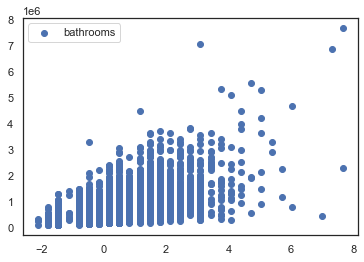

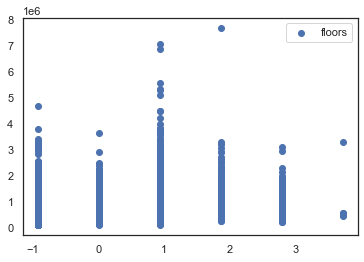

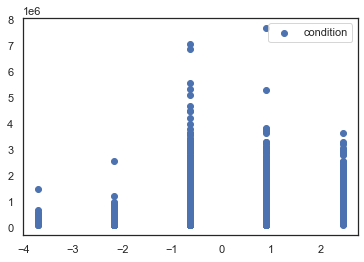

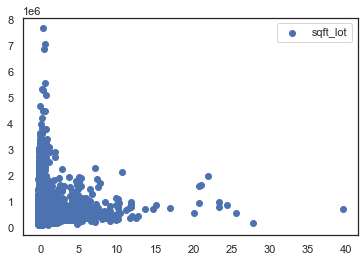

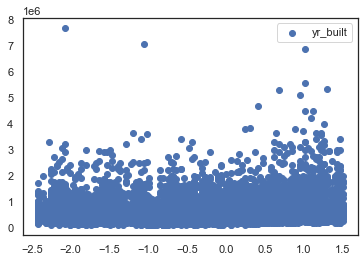

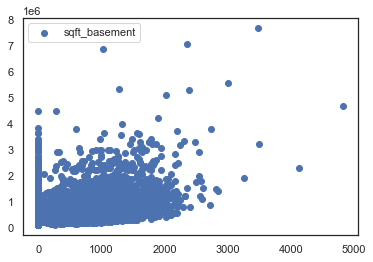

In [17]:
for column in ['zipcode', 'waterfront', 'sqft_living', 'grade', 'bathrooms', 'floors', 'condition', 'sqft_lot', 'yr_built', 'sqft_basement']:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

From the scatter plots, we can see a clear linear relationship between price and square feet of living space, price and number of bathrooms, and price and grade. 

We will take a look at the correlation between price and the other variables below:

In [18]:
import math
def mean_normalize(var):

    norm = []
    n = 0
    mean = np.mean(var)
    
    for i in var:
        diff = var[n] - mean
        norm.append(diff)
        n = n + 1
    
    return norm

def correlation(var1,var2):
    if len(var1) != len(var2):
        return None
    else: 
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = [a * b for a, b in list(zip(mean_norm_var1, mean_norm_var2))]
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return np.round(sum(var1_dot_var2) / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)
    

correlation(data['price'], data['bathrooms'])

0.53

In [19]:
correlation(data['price'], data['sqft_living'])

0.7

In [20]:
correlation(data['price'], data['zipcode'])

-0.05

In [21]:
correlation(data['price'], data['waterfront'])

0.26

In [22]:
correlation(data['price'], data['grade'])

0.67

In [23]:
correlation(data['price'],data['floors'])

0.26

In [24]:
correlation(data['price'], data['condition'])

0.04

In [25]:
correlation(data['price'], data['sqft_lot'])

0.09

In [26]:
correlation(data['price'], data['yr_built'])

0.05

In [27]:
correlation(data['price'], data['sqft_basement'])

0.32

From the above data, we can tell that there is a slight positive correlation between between price and the number of bathrooms. There is also a moderate positive correlation between price and grade and price and the square footage of living space. So far the strongest indicator of home price is the amount of square footage in the living area at a correlation of 0.7. However, any correlation lower than .85 isn't really enough for us to confidently say that there is a strong correlation between the two variables.

This follows what one would expect. However, it may be surprising to some that condition has such a weak correlation. It may be surprising to some that the number of bathrooms correlate to house price as much as they do.

Below we will focus on the strongest correlating variables that we have: grade, sqft_living, and number of bathrooms.

In [28]:
data['price'] = np.log(data['price'])
data['grade'] = np.log(data['grade'])
data['sqft_living'] = np.log(data['sqft_living'])
data['bathrooms'] = np.log(data['bathrooms'])
data['sqft_basement'] = np.log(data['sqft_basement'])

/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


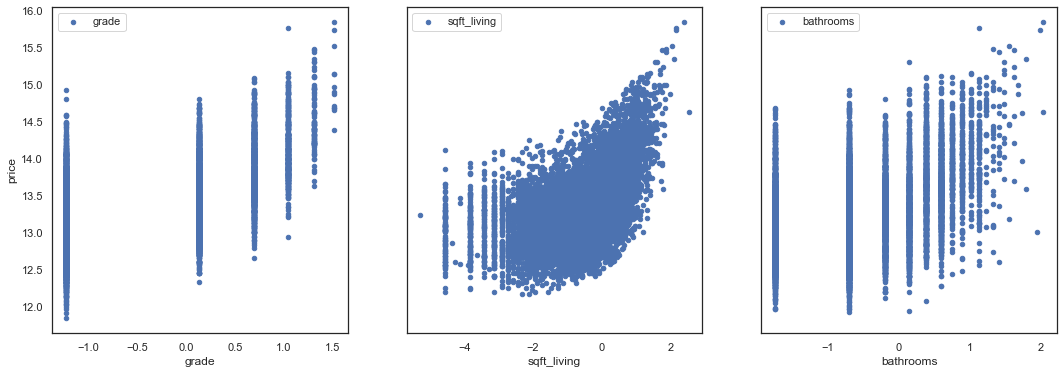

In [29]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18,6))
for idx, channel in enumerate(['grade', 'sqft_living', 'bathrooms']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f1 = 'price~grade'
f2 = 'price~sqft_living'
f3 = 'price~bathrooms'

model1 = smf.ols(formula=f1, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()
model3 = smf.ols(formula=f3, data=data).fit()

In [31]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     5957.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:45:46   Log-Likelihood:                -4737.4
No. Observations:               10315   AIC:                             9479.
Df Residuals:                   10313   BIC:                             9493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5471      0.005   2980.664      0.000      13.538      13.556
grade          0.3490      0.005     77.182      0.000       0.340       0.358
==============================================================================
Omnibus:                      233.859   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.890
Skew:                           0.316   Prob(JB):                     4.54e-61
Kurtosis:                       3.497   Cond. No.                         1.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the OLS Regression Analysis of the relationship between price and grade, the R-Squared Value of .44 indicates that although there may seem to be a relationship between price and grade, it is statistically insignificant. The Jarque-Bera (JB) results show an extremely high level of deviation.

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3427.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:46:33   Log-Likelihood:                -4947.3
No. Observations:                9138   AIC:                             9899.
Df Residuals:                    9136   BIC:                             9913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.5191      0.005   2750.784      0.000      13.509      13.529
sqft_living     0.2176      0.004     58.542      0.000       0.210       0.225
==============================================================================
Omnibus:                      172.888   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.154
Skew:                           0.334   Prob(JB):                     1.69e-40
Kurtosis:                       3.186   Cond. No.                         1.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS Regression Analysis of the relationship between price and square feet of living space appeared to be the most promising from our previous analyses. Here, however, we see that the R-Squared value of .493 is hardly any improvement on the relationship between price and grade. 

The Jarque-Bera score is also far too high. 

In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2340.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:46:41   Log-Likelihood:                -7316.5
No. Observations:               11239   AIC:                         1.464e+04
Df Residuals:                   11237   BIC:                         1.465e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4134      0.005   2470.748      0.000      13.403      13.424
bathrooms      0.2810      0.006     48.371      0.000       0.270       0.292
==============================================================================
Omnibus:                      294.495   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.995
Skew:                           0.393   Prob(JB):                     3.27e-70
Kurtosis:                       3.253   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, the relationship between price and the number of bathrooms is even weaker than the previous two relationships, as indicated by the R-Squared value of .277. The Jarque-Bera score is also much higher than the other two relationships.

Next, we will view the "goodness of fit" between the independent and dependant variables for each of our three columns.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


      grade
0 -1.232432
1  1.515881
0    13.116971
1    14.076146
dtype: float64


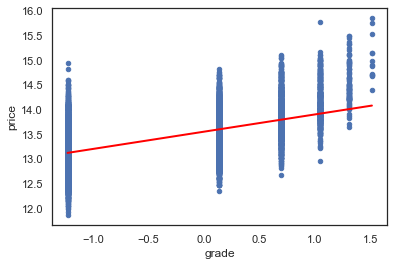

In [34]:
X_new1 = pd.DataFrame({'grade': [data.grade.min(), data.grade.max()]})
print(X_new1.head())

preds = model1.predict(X_new1)
print(preds)

data.plot(kind='scatter', x='grade', y='price')
plt.plot(X_new1, preds, c='red', linewidth=2)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


   sqft_living
0    -5.279410
1     2.524277
0    12.370457
1    14.068341
dtype: float64


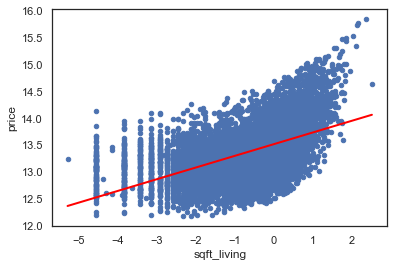

In [35]:
X_new2 = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new2.head())

preds = model2.predict(X_new2)
print(preds)


data.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new2, preds, c='red', linewidth=2)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


   bathrooms
0  -1.745935
1   2.034951
0    12.922820
1    13.985219
dtype: float64


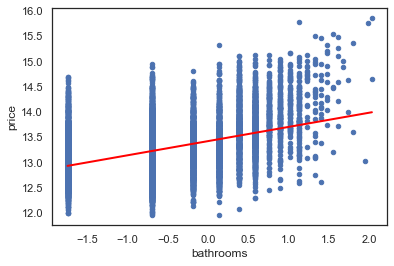

In [36]:
X_new3 = pd.DataFrame({'bathrooms': [data.bathrooms.min(), data.bathrooms.max()]})
print(X_new3.head())

preds = model3.predict(X_new3)
print(preds)


data.plot(kind='scatter', x='bathrooms', y='price')
plt.plot(X_new3, preds, c='red', linewidth=2)
plt.show()

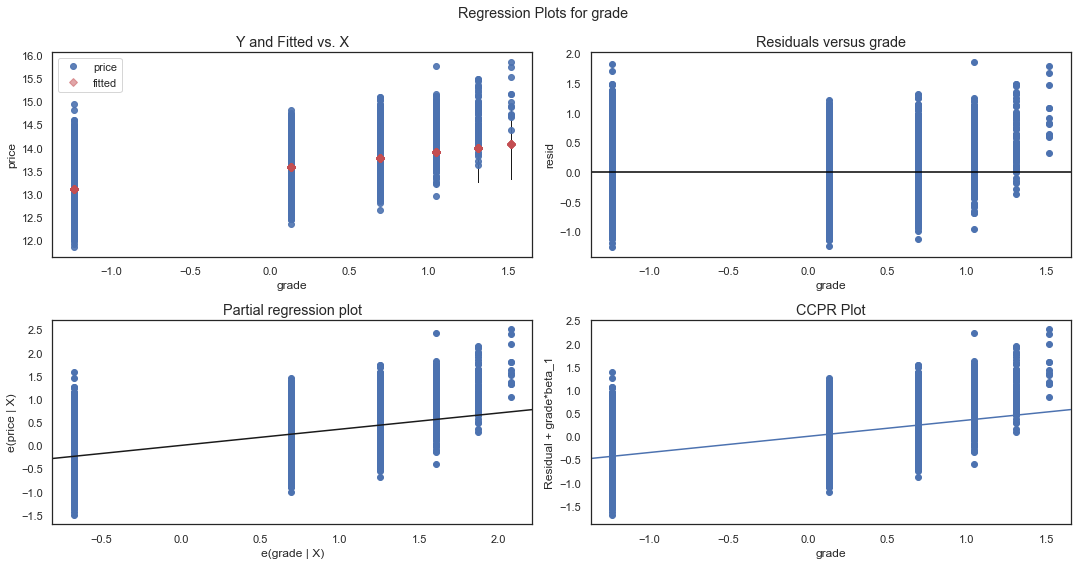

In [37]:
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(model1, "grade", fig=fig1)
plt.show()

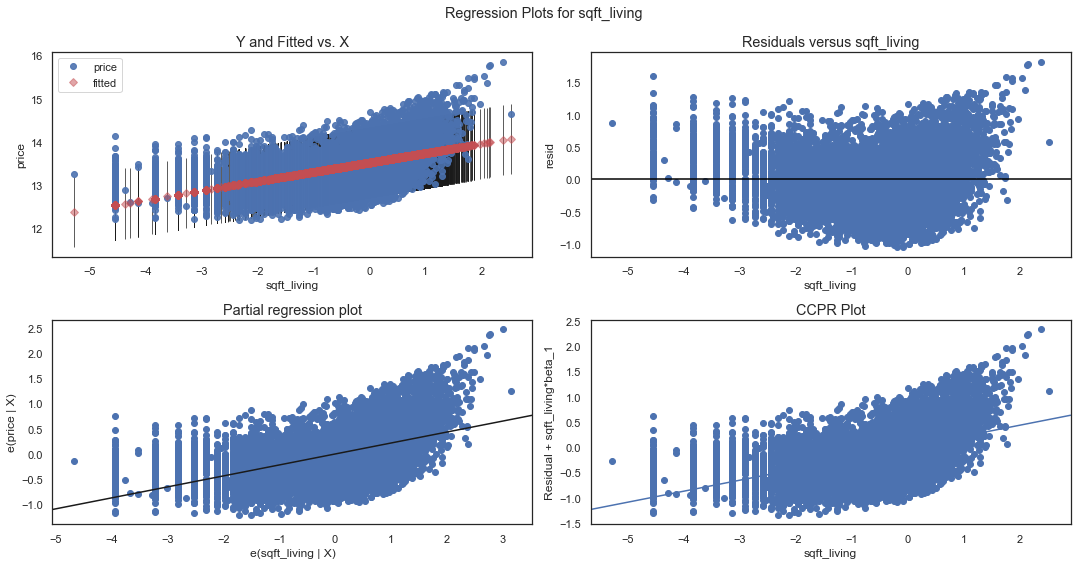

In [38]:
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(model2, "sqft_living", fig=fig2)
plt.show()

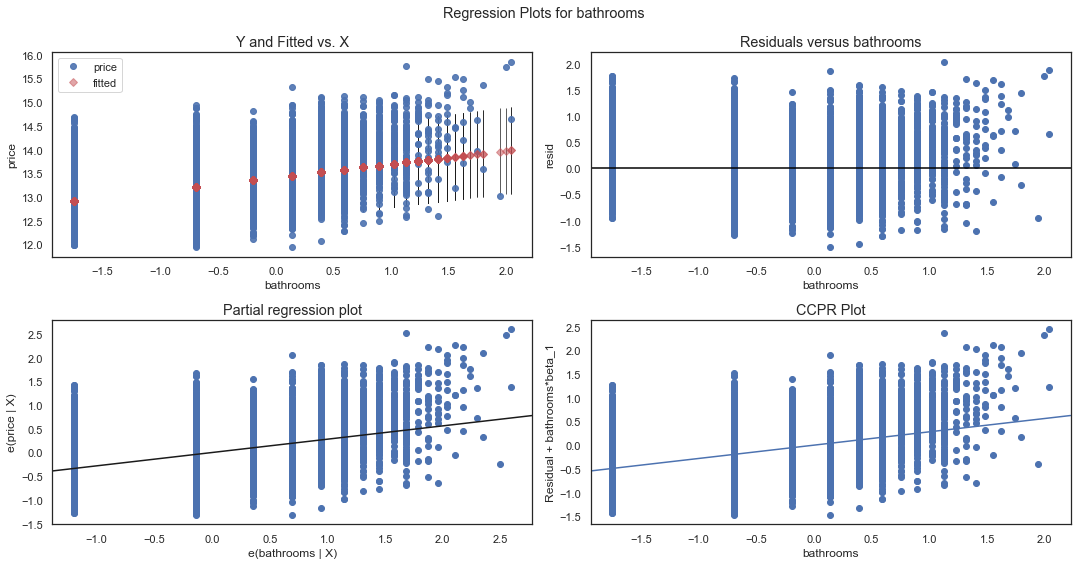

In [39]:
fig3 = plt.figure(figsize=(15,8))
fig3 = sm.graphics.plot_regress_exog(model3, "bathrooms", fig=fig3)
plt.show()

From the above regression models, we can see that there is a poorness of fit between price and the independent variables (grade, square feet of living space, and number of bathrooms).

Below we will apply log to minimize the effects of skewedness on the variables.

As a final step, we will test/train our data with our most promising three categories. We will do this using a k-folds cross-validation analysis.

In [40]:
X = data[['bathrooms', 'sqft_living', 'grade']]
y = pd.DataFrame(data.price, columns = ['price'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)


16197 5400 16197 5400


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [41]:
def kfolds(data, k):
    
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds =[]
    start_obs = 0
    for fold_n in range(1, k+1):
        if fold_n <= leftovers:
            fold = data.iloc[start_obs : start_obs+fold_size+1]
            folds.append(fold)
            start_obs += fold_size + 1
        else: 
            fold = data.iloc[start_obs : start_obs + fold_size]
            folds.append(fold)
            start_obs += fold_size
              
    return folds

In [42]:
data = pd.concat([X.reset_index(drop=True), y], axis=1)
folds = kfolds(data, 3)

In [43]:
test_errs = []
train_errs = []
k=3

for n in range(k):
    
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    
    linreg.fit(train[X.columns], train[y.columns])
    
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_3_results = cross_val_score(linreg, X, y, cv=3, scoring='neg_mean_squared_error')

cv_3_results

/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/shannonamcchesney/anaconda3/lib/python3.7/site-packages/skle

array([nan, nan, nan])

In [45]:
correlation(data['price'], data['grade'])

nan

In [43]:
correlation(data['price'], data['sqft_living'])

0.67

In [44]:
correlation(data['price'], data['bathrooms'])

0.52

From our above test/train data we can see that our algorithm fits the model as expected. 

<AxesSubplot:xlabel='sqft_living'>

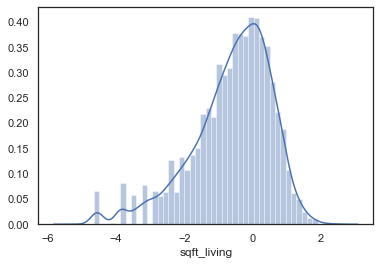

In [46]:
import seaborn as sns
sns.distplot(data['sqft_living'], bins=50, kde=True)

Finally, we can see that square feet of living space forms a nice positively-skewed, single-peaked bell curve with a long tail containing outliers. This single peak means that our data is pretty evenly distributed. 

None of the variables independently have an R-Squared Value high enough for it to be used in a predictive model. Let's see what happens when we combine them.

In [47]:
import statsmodels.formula.api as smf
new_model = 'price ~ bathrooms + sqft_living + grade'
smf.ols(formula=new_model, data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     1596.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:56:38   Log-Likelihood:                -2728.4
No. Observations:                6567   AIC:                             5465.
Df Residuals:                    6563   BIC:                             5492.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.6220      0.005   2683.941      0.000      13.612      13.632
bathrooms       0.0914      0.007     13.194      0.000       0.078       0.105
sqft_living     0.1142      0.005     20.936      0.000       0.104       0.125
grade           0.2231      0.006     35.576      0.000       0.211       0.235
==============================================================================
Omnibus:                      144.845   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.712
Skew:                           0.362   Prob(JB):                     2.54e-34
Kurtosis:                       3.206   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared Value (0.54) here is a great improvement on the R-Squared Value of each individual variable, but it's still too low to be considered a working model (>=0.85), so let's try adding some of the variables with lower correlations.

In [48]:
new_model2 = "price ~ sqft_living + grade + bathrooms + sqft_basement"
smf.ols(formula=new_model2, data=data).fit().summary()

PatsyError: Error evaluating factor: NameError: name 'sqft_basement' is not defined
    price ~ sqft_living + grade + bathrooms + sqft_basement
                                              ^^^^^^^^^^^^^

### Results Analysis:

In conclusion, although none of the data columns presented show a .85 or above correlation to housing price, square feet of living space shows the greatest amount of promise at .70 (enough to say that there is a strong correlation). Number of bedrooms (.53) and grade (.67) also show some correlation. 

More data could be collected and processed to attempt a .85 correlation. Alternatively, one could factor in mitigating circumstances such as a homeowner's desire to sell immediately as contributing causes for price dampening, which would also work to drive price lower than its real value.

### 2. How Have Neighborhoods Been Changed by Developers?

From our first heatmap there seems to be a negative correlation between the year built and zipcode, but what's really the relationship?

In [39]:
kings.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

We can see from the information above there are seventy different zipcodes in King County. A quick Google search will tell you that King County contains over 2 million people in just over 2,300 square miles, including the city of Seattle and the suburbs of Tacoma. 

Due to the nature of cities of attracting new residents, one might theorize that there would be more development in the zipcodes in and around Seattle and Tacoma than in the more rural zipcodes in the county. So let's test that theory:

In [40]:
kings.zipcode.value_counts().head(10)

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: zipcode, dtype: int64

From the top ten zipcodes with houses for sale in the dataset, we can see that the majority of them when typed into our favorite mapping site will show areas north or east of Seattle--essentially suburbs of the sprawling island city.

But are they new developments or older houses looking for new owners? Let's take a look at the years in the which the houses were built.

In [41]:
kings.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [42]:
kings.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    317
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1947    263
1999    263
1963    255
1976    253
1966    249
1994    249
1950    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     58
1917     56
1914     54
1938     52
1903     46
1904     45
1936     40
1932     38
2015     38
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

We can see from the above data that although a good number of the houses for sale have been constructed within the past 15 years, many have been built throughout the last century. 

In [43]:
correlation(kings['zipcode'], kings['yr_built'])

-0.35

There seems to be a weak negative correlation between zip code and year built. Let's graph the correlation to see the relationship more clearly.

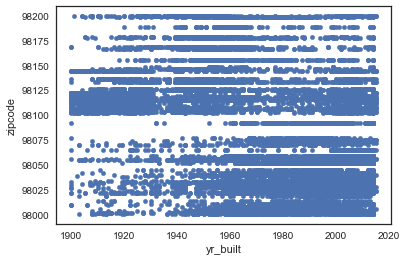

In [76]:
kings.plot(kind='scatter', x='yr_built', y='zipcode')
plt.show()

### Results Analysis:

From the above scatter plot we can tell that over the past ten to twenty years, there has been an increase of development across all of the zip codes for King County. However, between 1900 and 1960, zip codes betweeen 98101 and 98125 saw the highest density of development. This changed in the 1960s and through to the turn of the century when the zip codes between 98001 and 98075 saw more development. 

More in-depth research into these particular neighborhoods would provide a better socio-economic analysis on how these neighborhoods were affected by said development--information valuable to socially-conscious investors.

### 3. How Have Houses Changed Throughout the Years?

We can also see from the previous heatmap that there seems to be a fairly strong postive correlation between the year built and the number of bathrooms.

In [61]:
correlation(kings['yr_built'], data['bathrooms'])

0.51

So here we can see there  might be a positive correlation between the number of bathrooms in a house and the year it was built. Let's use another graph to track the changes in the number of bathrooms as the years pass.

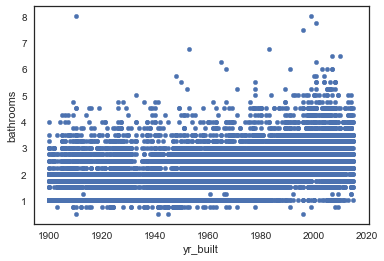

In [71]:
kings.plot(kind='scatter', x='yr_built', y='bathrooms')
plt.show()

### Results Analysis:

The change is slight in the above scatter plot, though it is still clearly visible via the outliers. In the 1900s, it was rare for a house to have more than three bathrooms. By the 1960s, while most houses had between 1 and 3 bathrooms, it was less rare than before to see four or more bathrooms. By the 2000s, the number of houses having four or five bathrooms increased, with some houses having as many as eight bathrooms.

Further research could be undertaken to see if there is a change in the occupancy of the houses (families versus roommates). However, it would not be a revelation to note how individualism has increased over the past fifty years.

## Final Thoughts:

* The final sale price of a house seems primarily related to the square feet of living space. Grade also influences the sale price, as homebuyers likely will pay less for a house that needs additional work. 

* The number of bathrooms can also raise the price of a house, but the can be viewed as an amenity rather than a necessity like bedrooms, which are often fixed by the number of people in the group purchasing the house. While having a bathroom to oneself is a nice luxury, it's not a vital requirement for many. 

* As the desire for individualism has grown, and consumers grow more desirous of their own space in a shared house, the number of bathrooms per house has increased. 

* As a city's population increases, development continues across all zip codes to maximize the availability of dwellings in a high-demand market. As space at a city's center decreases, developers must look further out into the suburbs and more rural areas to establish more real estate ventures.